In [34]:
import bob
import bob.io.base
import pandas as pd
import h5py
import numpy as np
from matplotlib import pyplot as plt
from scikits.audiolab import wavread, wavwrite
%matplotlib inline

# Read Audio

In [44]:
audio, FS, encoding = wavread('/Users/slegroux/Projects/Databases/voxforge/aaa-20150128-fak/wav/a0557.wav')

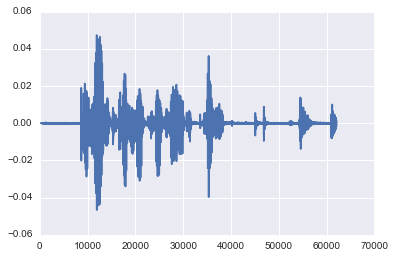

In [50]:
plt.plot(audio)

# Preprocessing

In [45]:
!./bin/preprocess.py \
    -p energy-2gauss \
    -i /Users/slegroux/Projects/Databases/voxforge/aaa-20150128-fak/wav/a0557.wav \
    -o energy-2gauss.hdf5

In [76]:
file = h5py.File('energy-2gauss.hdf5', 'r')
dataset = file['data']
print np.shape(dataset)
labels = file['labels']
print np.shape(labels)

(62000,)
(386,)


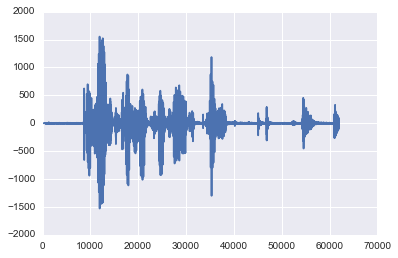

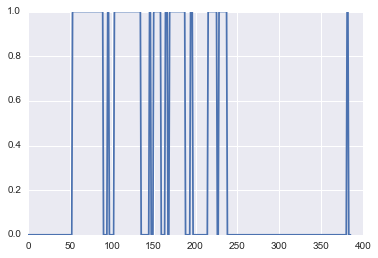

In [75]:
plt.figure()
plt.plot(dataset.value)
plt.figure()
plt.plot(labels.value)
plt.show()

In [46]:
!./bin/preprocess.py \
    -p energy-thr \
    -i /Users/slegroux/Projects/Databases/voxforge/aaa-20150128-fak/wav/a0557.wav \
    -o energy-thr.hdf5

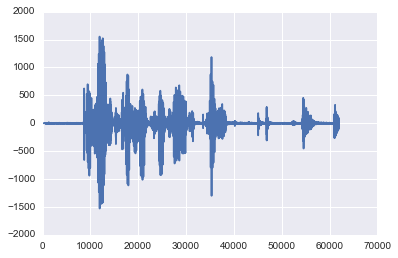

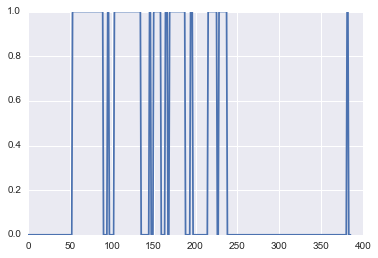

In [77]:
file = h5py.File('energy-thr.hdf5', 'r')
dataset = file['data']
labels = file['labels']
plt.figure()
plt.plot(dataset.value)
plt.figure()
plt.plot(labels.value)
plt.show()

In [48]:
!./bin/preprocess.py \
    -p mod-4hz \
    -i /Users/slegroux/Projects/Databases/voxforge/aaa-20150128-fak/wav/a0557.wav \
    -o mod-4hz.hdf5

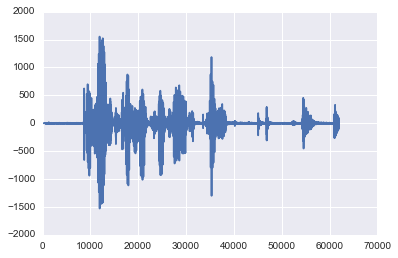

In [49]:
file = h5py.File('energy-thr.hdf5', 'r')
dataset = file['data']
plt.plot(dataset.value)

# Feature extraction

In [56]:
!./bin/extract.py \
    -e mfcc-60 \
    -p energy-2gauss \
    -i 'energy-2gauss.hdf5' \
    -o mfcc-60.hdf5

In [60]:
file = h5py.File('mfcc-60.hdf5', 'r')
dataset = file['array']
np.shape(dataset)

(198, 60)

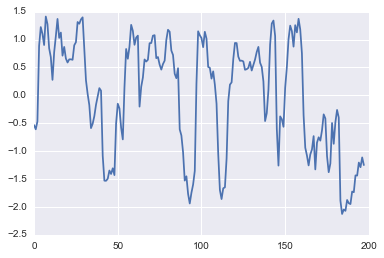

In [63]:
plt.plot(dataset[:,0])